# Umang Chavan uchavan2

# Lab 10 - Social Networks as Graphs

###  Peter Kairouz and Pramod Viswanath

In this lab, you will learn how to: (a) represent social networks as graphs, (b) visualize them using a Python package called NetworkX, and (c) spread information over a social network. 

You will need to <a href="http://networkx.github.io/documentation/latest/install.html">install NetworkX</a>  in order to complete this lab. Use the command: `pip install networkx --user` to install NetworkX on your machine. Many of you may already have NetworkX because it comes with the Anaconda installation of iPython. Click <a href="http://networkx.readthedocs.org/en/networkx-1.11/tutorial/tutorial.html">here</a> for a good tutorial on NetowrkX.

After filling this notebook and running all the cells, rename the file **lab10.ipynb** to **netid_lab10.ipynb**, include your **well commented** code, and submit it to ECE398B.ou33plgnai09l620@u.box.com. Be sure to use your illinois email account. If your code depends on any files not provided for the lab, then also upload those by including as an attachment in your email. Your email may include multiple attachments, but several emails, each with its own attachment, are OK too. Be sure to fill in your name + netid at the top of your completed IPython notebook. You should recieve a confirmation email from Box after submission (if you do not see it, check your spam folder). If you do not see it after a half hour, email the lab (i.e., send the email with the same attachments described above, which you sent to Box) to jiaqimu2@illinois.edu from your Illinois email account with the subject ECE398BD-NetID-Lab#. Use the same filenames you used in maling to Box. Avoid unneeded steps/computations and make sure your code runs before submitting it. Grading is based on your submission which is due at **9 p.m. Nov 14, 2017**. Note that late labs will **strictly not be accepted** starting from now.

## Exercise 1: Representing Social Networks in Software (30 pts)

A social network is mathematically represented by a graph $$G = (V,E)$$ where $V$ represents the set of nodes and $E$ denotes the set of edges in the graph. A user is represented by a node $u \in V$ and a
friendship between users $u$ and $v$ is represented by an edge $(u,v) \in E$. In other
words, if users $u$ and $v$ are friends, then there is an edge between nodes
$u$ and $v$ (i.e., $(u,v) \in E$).

In software, a graph $G$ is represented by an adjacency list `A` of size
$|V|$, the number of nodes in $G$. The $u^{th}$ entry of `A` contains the
list of nodes $u$ is connected to. Therefore, `A` is a list of lists. In this
lab assignment, you are required to read a file which describes a social network and form its adjacency list. Each line in the file contains
data of the form `u v c d`. This means that nodes $u$ and $v$ are
connected to each other (i.e., for nodes $u,v \in V$ we have that $(u,v) \in
E$). Ignore `c` and `d` as they do not contain any relevant information.

Write a function called `build_adjacency` that accepts
`filename`, `min_degree`, and `num_nodes` as input
parameters and returns `adjacency` as output. Start by declaring a
list (of empty lists) of size `num_nodes` and then open the file
`filename` which contains the social network. The social network data
is stored in `out.facebook-wosn-links` which can be found on the
course webpage. When reading the file `out.facebook-wosn-links`,
consider the first `num_nodes` and ignore the rest. After forming the
adjacency list for the first `num_nodes` nodes, ignore (delete) all the nodes
that have less than `min_degree` friends. For example, assume node
`u` has less than `min_degree` neighbors, then set
`adjacency[u] = []` and remove node `u` from its neighbors' lists.
Finally, return the updated `adjacency` list.

In [231]:
def build_adjacency(filename, min_degree, num_nodes):
    
    adjacency = [[] for i in range(num_nodes)]
    
    # your code goes here
    node_count = 0
    node_adjacency = []
    last_node = 0
    
    f = open(filename, 'r')
    
    for line in f:
        u_v = line.split()
        if(int(u_v[0]) > num_nodes):            # This is to make sure that the adjacency list only contains num_nodes lists
            break
        if (int(u_v[0]) < num_nodes and int(u_v[1]) < num_nodes):   # adding an edge from one vertex to the other and vice versa
            adjacency[int(u_v[0])].append(int(u_v[1]))
            adjacency[int(u_v[1])].append(int(u_v[0]))
    
    remove_node_list = []                             # This list will contain the nodes that fail according to the min degree condition
    for u in range(len(adjacency)):                   # The following loop will add the certain vertices
        if len(adjacency[u]) < min_degree:
            remove_node_list.append(u)
    
    
    for node in remove_node_list:                     # This chunk iterates through the "remove_node_list" and then goes through corresponding
        for neighbor in adjacency[node]:              # neighbors list and deletes the specific vertex from the neighbor's list
             adjacency[neighbor].remove(node)
        adjacency[node] = []                          # sets the list as empty for the vertex that fails to reach the min_degree condition
            
    return adjacency

----

## Exercise 2: Visualizing Social Networks (20 pts)

You will need the following basic imports and function to draw graphs for you. You should know how to use `draw_graph`, but you don't really need to know how it works.

In [232]:
from pylab import *
import random as rnd
import networkx as nx
from __future__ import division

rcParams['figure.figsize'] = 12, 12  # that's default image size for this interactive session

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):
    """ 
    Based on: https://www.udacity.com/wiki/creating-network-graphs-with-python
    We describe a graph as a list enumerating all edges.
    Ex: graph = [(1,2), (2,3)] represents a graph with 2 edges - (node1 - node2) and (node2 - node3)
    """
    
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    # show graph
    plt.show()

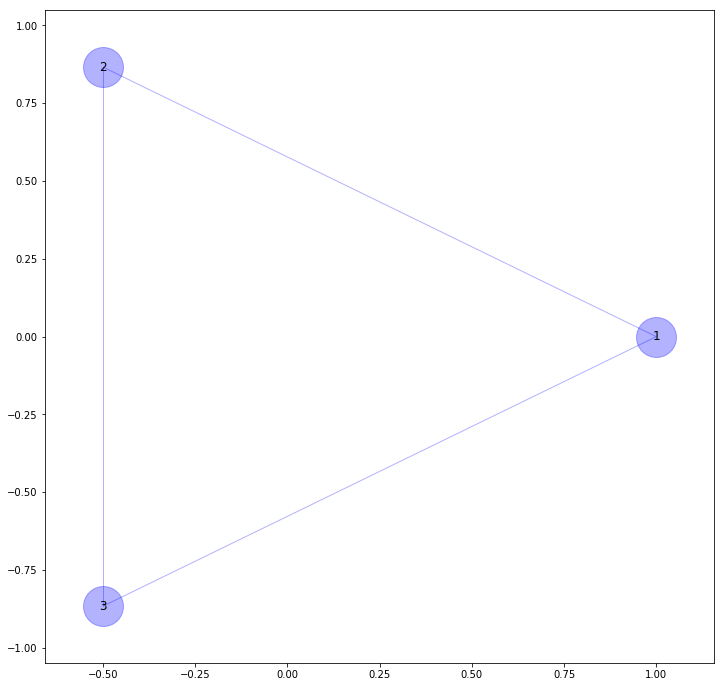

In [233]:
# run this cell for a few graphs of your choice
graph = [(1,2),(2,3),(1,3)]
draw_graph(graph)

Write a function that accepts an adjancency list (called `adjacency`) and outputs a list of tuples (called `graph`).

In [234]:
def adjacency_to_graph(adjacency):
    graph = []
    
    # your code goes here
    for node_u in range(len(adjacency)):    # This gives us an index for a list in adjacency. It is also the "u" node
        for node_v in adjacency[node_u]:    # This gives a specific node value in the list of neighbors of u. It is the "v"
            tup = (node_u, node_v)          # node
            graph.append(tup)
    return graph

Tweak and run the code below to visualize a small social netowrk. 

done graph 202


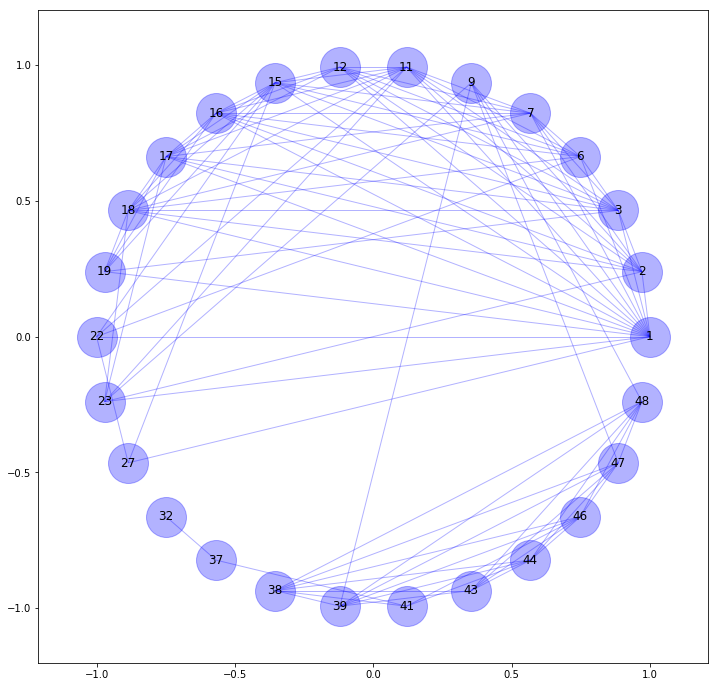

In [235]:
adjacency = build_adjacency('out.facebook-wosn-links',4,50)
graph = adjacency_to_graph(adjacency)
print 'done graph', len(graph)
draw_graph(graph)

----

## Exercise 3: Spreading Rumors over Social Networks (50 pts)

**Susceptible-Infected Model. **
The susceptible-infected (SI) model states that the rumor starts at node $v^* \in G$ at $n=0$. We refer to $v^*$ as the rumor
source. At iteration $n=1$, $v^*$ can forward the rumor (uniformly at random) to 
**one and only one** of its neighbors. At iteration $n>1$, if node $v$ has the rumor, it can pass it to a node $u$ **if and only if** there is an edge between them.  This process is repeated in discrete time steps (iterations) until we have a total of $N$ nodes with the rumor. If a node $v$ has the rumor, we say that node $v$ is infected. If node $v$ passes the rumor to node $u$, we say that node $v$ infects node $u$. 

**Implementing the SI Model in Python. **
Given a social network represented by `adjacency` and a fixed number `N`, use
the SI model to infect `N` nodes starting from a randomly chosen rumor
source. In order to do so in Python, you can create a list (of empty lists)
called `who_infected` of `N` entries. This will store the
adjacency list of the infected sub-graph. You will also need to define a list
of size `N` that will keep track of the indices of the infected nodes
in the original underlying graph. Call this list `infected_nodes`.

Here is how you can fill up `who_infected` and
`infected_nodes`:

* At iteration `n = 0`, choose a source node `v*`
    uniformly at random from `{0, ..., num_nodes -1}`. If
    `adjacency[v*] = []` ignore the selected `v*` and redraw
    a new sample. Redo the aforementioned procedure (if needed) until you
    find a `v*` for which `adjacency[v*]` is not empty. Set
    `infected_nodes[0]=v*`. 
* At iteration `n = 1`, choose (uniformly at random) one of
    `v*`'s neighbors and infect it. Let's say the index of this
    infected node is `v_1`. Set
    `infected_nodes[1]=v_1` and update
    `who_infected` as follows:
    `who_infected[0]=[1]` and
    `who_infected[1]=[0]`. Notice that the node indices `v*` and `v_1` have been relabelled in the infected subgraph to become `0` and `1`, respectively.
* At iteration `n > 1`, consider the set of all susceptible nodes and infect **one** of them uniformly at random. The set of susceptible nodes: (a) contains the set of uninfected nodes that are connected to infected nodes: `v*`, `v_1`, ..., `v_{n-1}` (b) if an uninfected node is connected to $K$ infected nodes, then it must appear $K$ times in the list of susceptible nodes (each time for one of the infected nodes it's connected to). Let's say the index of the randomly chosen susceptible node is `v_n` and the index of the node that infected it is `v_k`. Set `infected_nodes[n]=v_n` and update `who_infected` as follows: append `n` to `who_infected[k]` and set `who_infected[n]=[k]`.
* Stop at iteration `n = N-1`.

**Simple Example. **
To better understand the details of the SI model, let's consider the following simple example. 

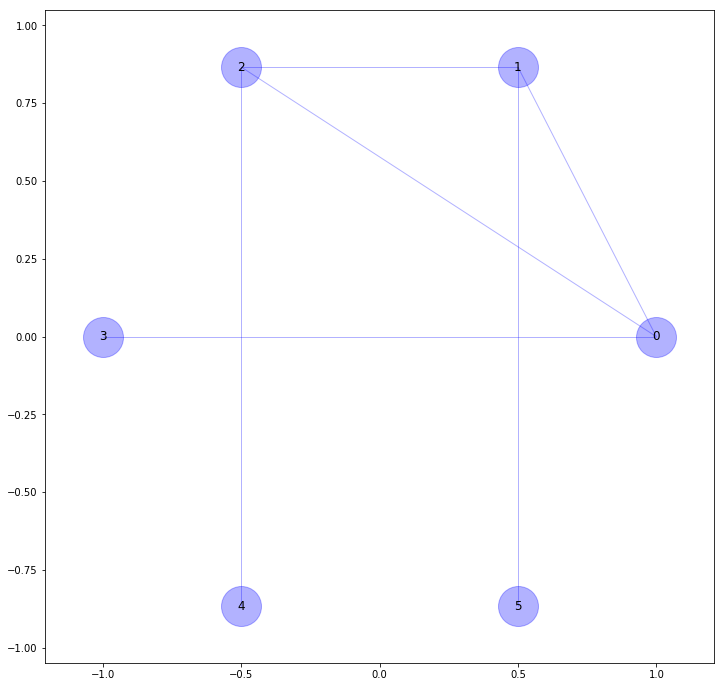

In [236]:
graph = [(0,1),(0,2),(0,3),(1,2),(1,5),(2,4)]
draw_graph(graph)

Let's assume  that node `0` is the rumor source. So, `infected_nodes[0] = 0` in this case. At `n = 1`, the susceptible list includes nodes `{1, 2, 3}`. Let's say you randomly select node `2` to be the second infected node. So, `infected_nodes[1] = 2`,  `who_infected[0] = 1`, and `who_infected[1] = 0`. At `n = 2`, the susceptible list includes nodes `{1, 3, 1, 4}`. Notice that node `1` appears twice since it can be infected by node `0` (hence the first occurrence) and by node `2` (hence the second occurrence). Let's say you randomly select the second occurrence of node `1` to be the third infected node. So, `infected_nodes[2] = 1`, `who_infected[1] = [0, 2]`, and `who_infected[2] = 1`. Make sure to remove the first occurrence of node `1` because you do not want to reinfect and already infected node at later iterations.

In [259]:
def generate_source(adjacency):
    # your code goes here
    source = rnd.randint(0, len(adjacency))
    while (len(adjacency[source]) == 0):
        source = rnd.randint(0, len(adjacency))
    return source

def si_model_rumor_spreading(source, adjancency, N):
    infected_nodes = [-1]*N;
    who_infected = [[] for i in range(N)]
    
    # adding the source node to the list of infected nodes
    infected_nodes[0] = source
    
    for i in range(1,N):
        
        while True:
            # your code goes here
            idx = rnd.randint(0, i-1)                    # Pick a random, infected node to spread from
            i_node = infected_nodes[idx]

            if len(adjacency[i_node]) == 0:              # If this node has no neigbors, continue on to another node
                continue

            new_i_node = rnd.sample(adjacency[i_node], 1)[0]            # Randomly pick a neighboring node to spread to

            if new_i_node in infected_nodes:                           # If this node is already infected, choose another one
                continue


            infected_nodes[i] = new_i_node
            who_infected[i].append(idx)
            who_infected[idx].append(i)

            break



    return who_infected, infected_nodes

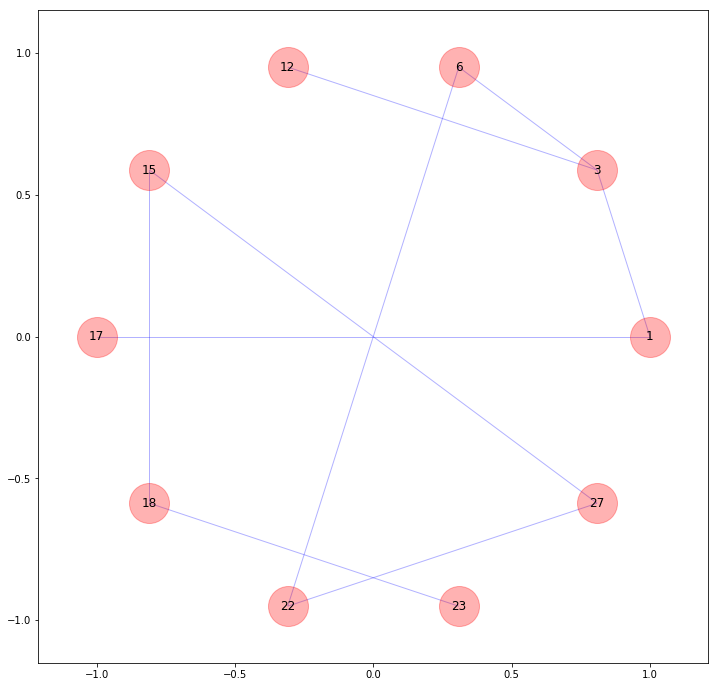

In [260]:
# run this script to test the above functions
N = 10
num_nodes = len(adjacency)
source = generate_source(adjacency)
who_infected, infected_nodes = si_model_rumor_spreading(source, adjacency, N)
graph = []
for i in xrange(N):
    for j in xrange(len(who_infected[i])):
        graph.append((infected_nodes[i], infected_nodes[who_infected[i][j]]))
draw_graph(graph, node_color = 'red')